<a href="https://colab.research.google.com/github/hkhong72/big_data/blob/main/221028_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist # MNIST 데이터 호출
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import sys
# KMP에러 나는걸방지
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# mnist 데이타가 어떻게 구성되어있는지 확인
# MNIST 데이터 = 7만개 데이터 중 6만개 학습용, 1만개 테스트용으로 미리 구분해놓고 있음
print("학습셋 이미지 수: %d개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d개" % (X_test.shape[0]))

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


In [ ]:
print(X_train.shape)

(60000, 28, 28)


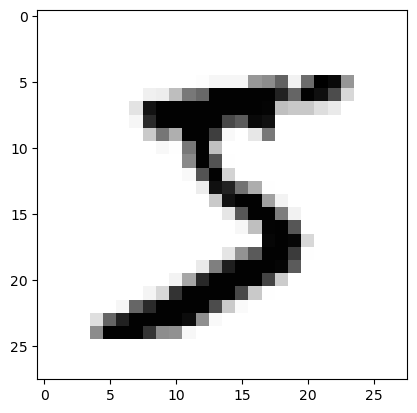

In [ ]:
plt.imshow(X_train[0], cmap='Greys') # 이미지 중 한개를 흑백으로 불러온다.
plt.show()

In [ ]:
# 불러온 이미지를 코드로 확인해보기
# 흰색 배경 =0, 글씨가 들어간 부분은 1~255 중 하나
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_train = X_train.astype(float) / 255

X_test = X_test.reshape(X_test.shape[0], 28*28).astype(float) / 255

print(y_train[0])

5


In [ ]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
print("class : %d " % (y_train[0]))

class : 5 


In [ ]:
print(type(y_train))

<class 'numpy.ndarray'>


In [ ]:
y_train = to_categorical(y_train) # 넘파이배열을 원핫인코딩 : to_categorical
y_test = to_categorical(y_test)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 딥러닝을 위한 프레임 설정 : 모델 설정
model = models.Sequential()
model.add(layers.Dense(512, input_dim=28*28, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일링
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_dir = 'data/model'
if not os.path.exists(model_dir):
    os.mkdir(model_path)

In [ ]:
# 모델 최적화를 위한 설정
modelpath = "data/model/mnist.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.19561, saving model to data/model\mnist.hdf5

Epoch 2: val_loss improved from 0.19561 to 0.13388, saving model to data/model\mnist.hdf5

Epoch 3: val_loss improved from 0.13388 to 0.11338, saving model to data/model\mnist.hdf5

Epoch 4: val_loss improved from 0.11338 to 0.09825, saving model to data/model\mnist.hdf5

Epoch 5: val_loss improved from 0.09825 to 0.09133, saving model to data/model\mnist.hdf5

Epoch 6: val_loss improved from 0.09133 to 0.08375, saving model to data/model\mnist.hdf5

Epoch 7: val_loss improved from 0.08375 to 0.08295, saving model to data/model\mnist.hdf5

Epoch 8: val_loss did not improve from 0.08295

Epoch 9: val_loss did not improve from 0.08295

Epoch 10: val_loss improved from 0.08295 to 0.08203, saving model to data/model\mnist.hdf5

Epoch 11: val_loss improved from 0.08203 to 0.08112, saving model to data/model\mnist.hdf5

Epoch 12: val_loss improved from 0.08112 to 0.07934, saving model to data/model\mnist.

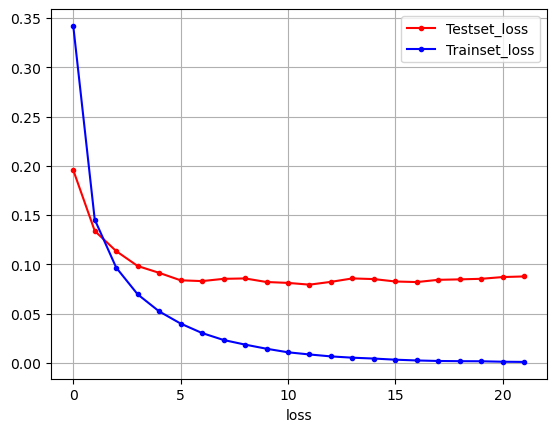

In [ ]:
# 학습셋의 오차를 그래프로 표현해보자
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프 만들기
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드 주기 + 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.xlabel('loss')
plt.show()

In [ ]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.0721 - accuracy: 0.9818

 Test Accuracy: 0.9818
